In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 1. Data

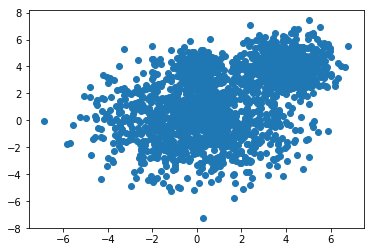

In [15]:
D = 2
s = 4
mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

N = 2000
X = np.zeros((N , D))
X[:1200, :]  = np.random.randn(1200, D)*2 + mu1
X[1200:1800, :] = np.random.randn(600, D) + mu2
X[1800:, :] = np. random.randn(200, D)*0.5 + mu3

plt.scatter(X[:, 0], X[:, 1])
plt.show()

# 2. GMM

In [16]:
K = 3

In [19]:
def gmm(X, K, max_iter=20, smoothing=1e-2):
    N, D = X.shape
    
    M = np.zeros((N, D))
    R = np.zeros((N, K))
    C = np.zeros((K, D, D))
    
    pi = np.ones(K) / K # uniform
    
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        C[k] = np.eye(D)
        
    costs = np.zeros(max_iter)
    weighted_pdfs = np.zeros((N, K))
    
    for i in range(max_iter):
        # step 1: determine assignments / resposibilities
        # this is the slow way
        # for k in range(K):
        #     for n in range(N):
        #         weighted_pdfs[n,k] = pi[k]*multivariate_normal.pdf(X[n], M[k], C[k])

        # for k in range(K):
        #     for n in range(N):
        #         R[n,k] = weighted_pdfs[n,k] / weighted_pdfs[n,:].sum()

        # a faster way to do step 1: "vectorization"
        
        for k in range(K):
            weighted_pdfs[:,k] = pi[k]*multivariate_normal.pdf(X, M[k], C[k])
        R = weighted_pdfs / weighted_pdfs.sum(axis=1, keepdims=True)

        # step 2: recalculate params
        for k in range(K):
            Nk = R[:,k].sum()
            pi[k] = Nk / N
            M[k] = R[:,k].dot(X) / Nk
            C[k] = np.sum(R[n,k]*np.outer(X[n] - M[k], X[n] - M[k]) for n in range(N)) / Nk + np.eye(D)*smoothing

        # log likelihood
        costs[i] = np.log(weighted_pdfs.sum(axis=1)).sum()
    
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
                break
                
    plt.plot(costs)
    plt.title("Costs")
    plt.show()

    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()

    print("pi:", pi)
    print("means:", M)
    print("covariances:", C)
    return R

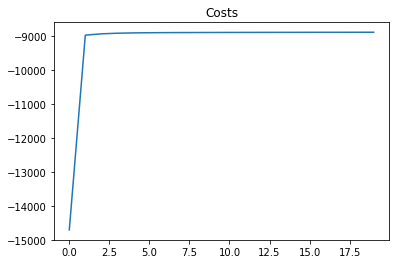

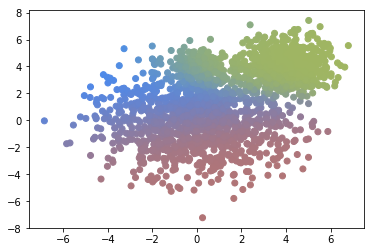

pi: [ 0.39186348  0.34854451  0.259592  ]
means: [[ 3.08652122  3.9648969 ]
 [ 0.22694178 -0.84654542]
 [-0.25595719  1.38139692]
 ..., 
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]
covariances: [[[ 3.53178434  0.16672126]
  [ 0.16672126  0.96465709]]

 [[ 4.09795118  0.10643479]
  [ 0.10643479  2.97796158]]

 [[ 4.22676084  0.51991115]
  [ 0.51991115  3.2243604 ]]]


array([[  4.98618270e-06,   8.15824097e-01,   1.84170916e-01],
       [  1.21389671e-02,   1.65841113e-01,   8.22019920e-01],
       [  1.29527427e-01,   2.66205994e-01,   6.04266579e-01],
       ..., 
       [  6.19285893e-01,   3.43912957e-02,   3.46322811e-01],
       [  6.67885912e-01,   2.25297993e-02,   3.09584288e-01],
       [  6.13587735e-01,   3.28870346e-02,   3.53525230e-01]])

In [20]:
gmm(X, K)